In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [2]:
df_Transmilenios=pd.read_csv('9. Base de las rutas de transporte e Bogotá (2021)- Estación Troncal.csv',encoding='latin1')

In [3]:
df_Transmilenios

,Shape,objectid,numero_estación,nombre_estación,ubicación,troncal_estación,numero_vagones,numero_accesos,biciestación,capacidad,tipo estación,biciparqueadero,latitud,longitud,last_edi_1
0,Point,1,2205,Calle 106,Calle 106,Autonorte,4,1,0,0,4,0,4.692982,-74.056178,27/09/2021
1,Point,2,2000,Portal del Norte,Calle 173,Autonorte,0,0,0,0,1,0,4.754621,-74.046035,27/09/2021
2,Point,3,7108,AV. El Dorado,Kr 30 Av 28,NQS,1,1,0,0,4,0,4.630663,-74.079866,27/09/2021
3,Point,4,2204,Pepe Sierra,Calle 116,Autonorte,2,1,0,0,4,0,4.698125,-74.055298,27/09/2021
4,Point,5,2103,Mazurén,Calle 152,Autonorte,5,1,0,0,4,0,4.734585,-74.049218,27/09/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Point,145,12000,Puente Aranda,calle 13 carrera 47,Americas,2,1,0,0,4,0,4.625669,-74.104640,27/09/2021
145,Point,146,10006,San Victorino,Kra 10- Cl12,Cr 7-10,3,2,0,0,4,0,4.601018,-74.077406,27/09/2021
146,Point,147,10003,Ciudad Jardín,Kra 10- Cl12 sur,Cr 7-10,2,1,0,0,4,0,4.581532,-74.090338,27/09/2021
147,Point,148,10004,Policarpa,Kra 10- Cl3 sur,Cr 7-10,2,2,0,0,4,0,4.586257,-74.086921,27/09/2021


In [4]:
df_Transmilenios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shape             149 non-null    object 
 1   objectid          149 non-null    int64  
 2   numero_estación   149 non-null    int64  
 3   nombre_estación   149 non-null    object 
 4   ubicación         149 non-null    object 
 5   troncal_estación  149 non-null    object 
 6   numero_vagones    149 non-null    int64  
 7   numero_accesos    149 non-null    int64  
 8   biciestación      149 non-null    int64  
 9   capacidad         149 non-null    int64  
 10  tipo estación     149 non-null    int64  
 11  biciparqueadero   149 non-null    int64  
 12  latitud           149 non-null    float64
 13  longitud          149 non-null    float64
 14  last_edi_1        149 non-null    object 
dtypes: float64(2), int64(8), object(5)
memory usage: 17.6+ KB


In [5]:
df_Transmilenios.describe() 

,objectid,numero_estación,numero_vagones,numero_accesos,biciestación,capacidad,tipo estación,biciparqueadero,latitud,longitud
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.000000,6608.020134,2.429530,1.315436,0.107383,25.221477,3.671141,0.107383,4.641021,-74.094631
std,43.156691,2938.717036,1.290585,0.582252,0.310643,104.654699,0.833772,0.310643,0.052343,0.034094
min,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.531715,-74.205460
25%,38.000000,4102.000000,2.000000,1.000000,0.000000,0.000000,4.000000,0.000000,4.597371,-74.110643
50%,75.000000,7006.000000,2.000000,1.000000,0.000000,0.000000,4.000000,0.000000,4.630663,-74.086921
75%,112.000000,9106.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,4.680501,-74.069839
max,149.000000,14005.000000,6.000000,2.000000,1.000000,785.000000,4.000000,1.000000,4.768818,-74.043569


In [6]:
df_Transmilenios[['numero_vagones', 'numero_accesos','capacidad']].describe()

,numero_vagones,numero_accesos,capacidad
count,149.000000,149.000000,149.000000
mean,2.429530,1.315436,25.221477
std,1.290585,0.582252,104.654699
min,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000
75%,3.000000,2.000000,0.000000
max,6.000000,2.000000,785.000000


<AxesSubplot:title={'center':'numero_vagones Frequency'}, ylabel='Frequency'>

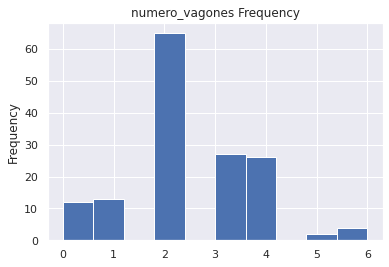

In [8]:
df_Transmilenios["numero_vagones"].plot.hist(title='numero_vagones Frequency')

<AxesSubplot:title={'center':'numero_accesos Frequency'}, ylabel='Frequency'>

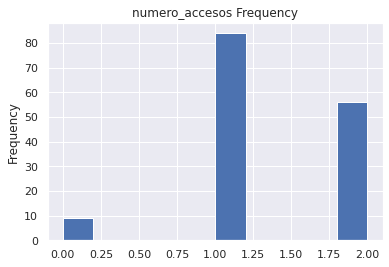

In [9]:
df_Transmilenios["numero_accesos"].plot.hist(title='numero_accesos Frequency')

<AxesSubplot:title={'center':'capacidad Frequency'}, ylabel='Frequency'>

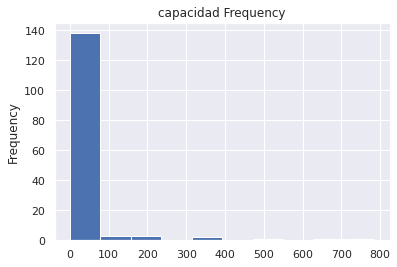

In [10]:
df_Transmilenios["capacidad"].plot.hist(title='capacidad Frequency')

Text(0.5, 1.0, 'Boxplot of numero_accesos vs. numero_vagones')

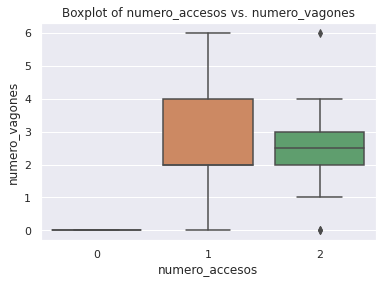

In [7]:
sns.boxplot(x = "numero_accesos", y='numero_vagones', data = df_Transmilenios)
plt.title("Boxplot of numero_accesos vs. numero_vagones")

In [9]:
df_Transmilenios[["numero_accesos", "numero_vagones"]].corr()

,numero_accesos,numero_vagones
numero_accesos,1.000000,0.250078
numero_vagones,0.250078,1.000000


In [10]:
df_Transmilenios[["capacidad", "numero_vagones"]].corr()

,capacidad,numero_vagones
capacidad,1.000000,-0.261593
numero_vagones,-0.261593,1.000000


In [11]:
df_Transmilenios_Filtered=df_Transmilenios[["numero_vagones","numero_accesos","biciestación", "capacidad",]]
df_Transmilenios_Filtered

,numero_vagones,numero_accesos,biciestación,capacidad
0,4,1,0,0
1,0,0,0,0
2,1,1,0,0
3,2,1,0,0
4,5,1,0,0
...,...,...,...,...
144,2,1,0,0
145,3,2,0,0
146,2,1,0,0
147,2,2,0,0


In [12]:
corr= df_Transmilenios_Filtered.corr()
corr

,numero_vagones,numero_accesos,biciestación,capacidad
numero_vagones,1.000000,0.250078,-0.082118,-0.261593
numero_accesos,0.250078,1.000000,-0.300607,-0.358533
biciestación,-0.082118,-0.300607,1.000000,0.697172
capacidad,-0.261593,-0.358533,0.697172,1.000000


<AxesSubplot:>

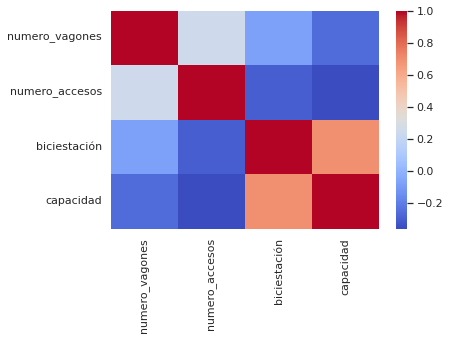

In [13]:
upp_mat = np.triu(df_Transmilenios.corr())
#,mask = upp_mat
sns.heatmap(df_Transmilenios_Filtered.corr(),cmap = 'coolwarm')

In [14]:
df_Transmilenios.groupby(['troncal_estación'])['troncal_estación'].count().sort_values(ascending=False)

troncal_estación
Caracas          27
NQS              23
Americas         18
Autonorte        17
Calle 26         14
Suba             14
Calle 80         13
Cr 7-10          11
Soacha            5
Tunal             3
Calle 6           2
Eje Ambiental     2
Name: troncal_estación, dtype: int64

<AxesSubplot:title={'center':'#Stations per Troncal'}, ylabel='troncal_estación'>

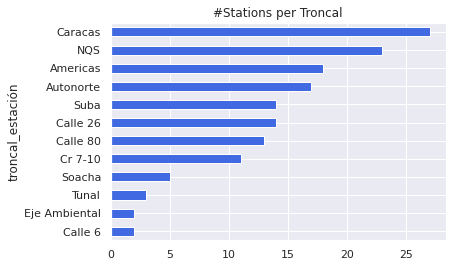

In [15]:
df_Transmilenios.groupby(['troncal_estación'])['troncal_estación'].count().sort_values(ascending=True).plot.barh(
                                                                                    title="#Stations per Troncal",
                                                                                     ylabel="Troncal", 
                                                                                     color="royalblue")

In [24]:
df_Transmilenios.groupby(['biciestación'])['biciestación'].count()

biciestación
0    133
1     16
Name: biciestación, dtype: int64

<AxesSubplot:title={'center':'% Biciestations'}, ylabel='biciestación'>

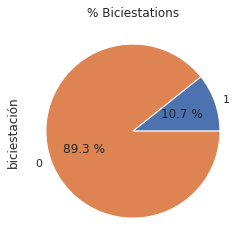

In [25]:
df_Transmilenios.groupby(['biciestación'])['biciestación'].count().sort_values(ascending=True).plot(kind='pie',
                                                                                    title="% Biciestations",
                                                                                    autopct="%0.1f %%"
                                                                                                   )

In [37]:
biciestacion=df_Transmilenios[df_Transmilenios["biciestación"]==1]
biciestacion.groupby(['tipo estación'])['biciestación'].count()

tipo estación
1    6
2    4
3    1
4    5
Name: biciestación, dtype: int64

<AxesSubplot:title={'center':'#Biciestaciones per Tipo estacion'}, xlabel='tipo estación'>

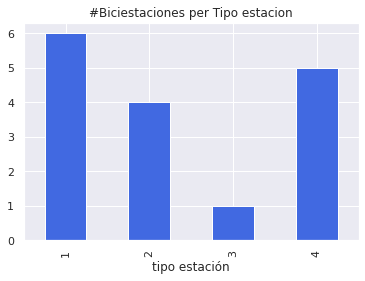

In [41]:
biciestacion.groupby(['tipo estación'])['biciestación'].count().plot(kind='bar',
                                                                        title="#Biciestaciones per Tipo estacion",
                                                                     color="royalblue"
                                                                                                   )

In [39]:
df_Transmilenios.groupby(['tipo estación'])['tipo estación'].count()

tipo estación
1      9
2      8
3      6
4    126
Name: tipo estación, dtype: int64

<AxesSubplot:title={'center':'#Tipo Estacion'}, xlabel='tipo estación'>

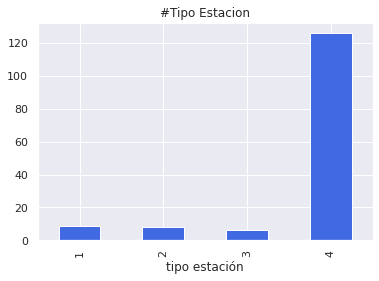

In [42]:
df_Transmilenios.groupby(['tipo estación'])['tipo estación'].count().plot.bar(title="#Tipo Estacion",
                                                                                     color="royalblue")

In [55]:
Bog_coords = [4.60971, -74.08175] # lat, long
folium_map = folium.Map(location=Bog_coords,zoom_start=13)
folium_map